Annual Income (k$) - годовой доход в тысячах долларов
Spending Score (1-100) - Оценка расходов

# 📌Импортирую библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌Загрузка и проверка

Загружаю базу данных.

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


База данных успешно загрузилась.

# 📌Проверка на дубликаты и Null-значения

In [5]:
print(f'Число дубликатов: {df.duplicated().sum()}')

Число дубликатов: 0


In [6]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 200 rows , 5 columns.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Отсутствуют Null-значения, и есть только один столбец с типом данных Object, который соответствует значениям этого столбца.

In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

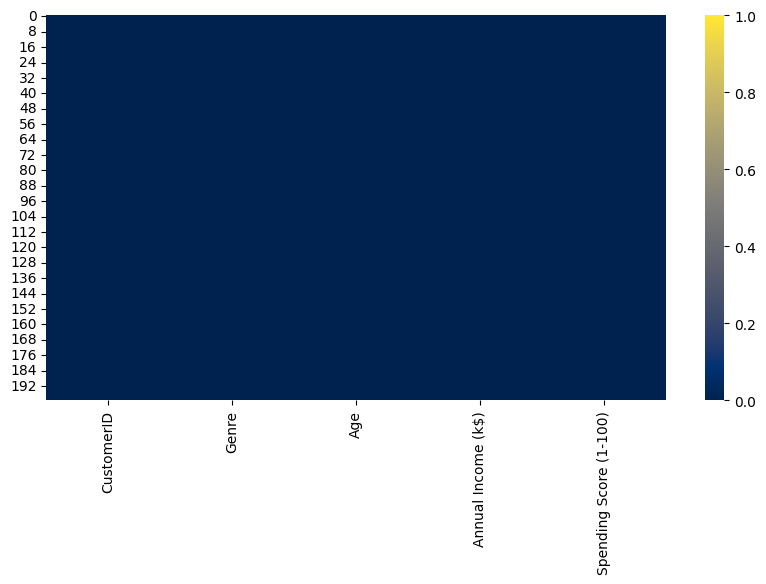

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), vmin=0.0, vmax=1.0, cmap='cividis')

# 📌Проверка на выбросы

Создаю базу данных без типа данных object

In [10]:
df_int = df[df.columns[df.dtypes != 'object']]
df_int

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


Нахожу столбцы с возможными выбросами

In [11]:
outlier_cols = []

for column in df_int.columns:
    Q1 = df_int[column].quantile(0.25)
    Q3 = df_int[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_int[column] < Q1 - 1.5 * IQR) | (df_int[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Столбцы с выбросами:", outlier_cols)

Столбцы с выбросами: ['Annual Income (k$)']


Визуализирую выбросы

<Axes: >

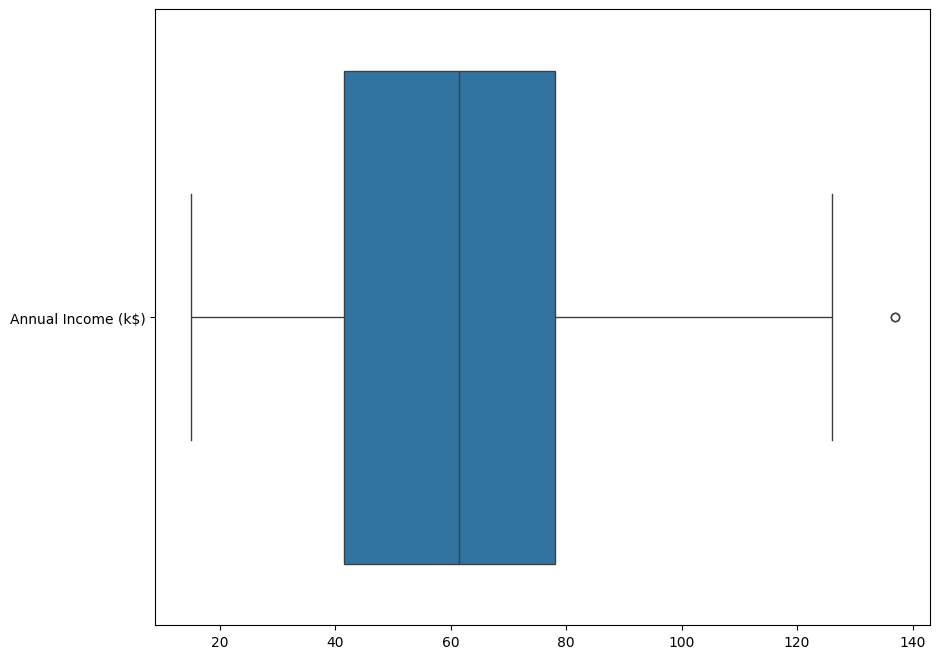

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(df_int[outlier_cols], orient='h')

Впринципе график выглядит хорошо, но имеется, предположительно, один выброс.

### 📌Просмотр выброса

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Здесь видно, что диапазоны значений находятся в правильных логических рамках.

In [14]:
df[df.columns[df.dtypes == 'object']].describe()

,Genre
count,200
unique,2
top,Female
freq,112


Ради интереса посмотрел столбец пола. Перевес идёт в сторону женщин.

In [15]:
df[df['Annual Income (k$)'] == df.describe()['Annual Income (k$)']['max']]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


Смотрю значение, которое попало в выброс и не нахожу ничего странного.

ВЫБРОСОВ НЕ ОБНАРУЖЕННО

# 📌Кодирование

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Genre = le.fit_transform(df.Genre)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# 📌Таблица корреляции

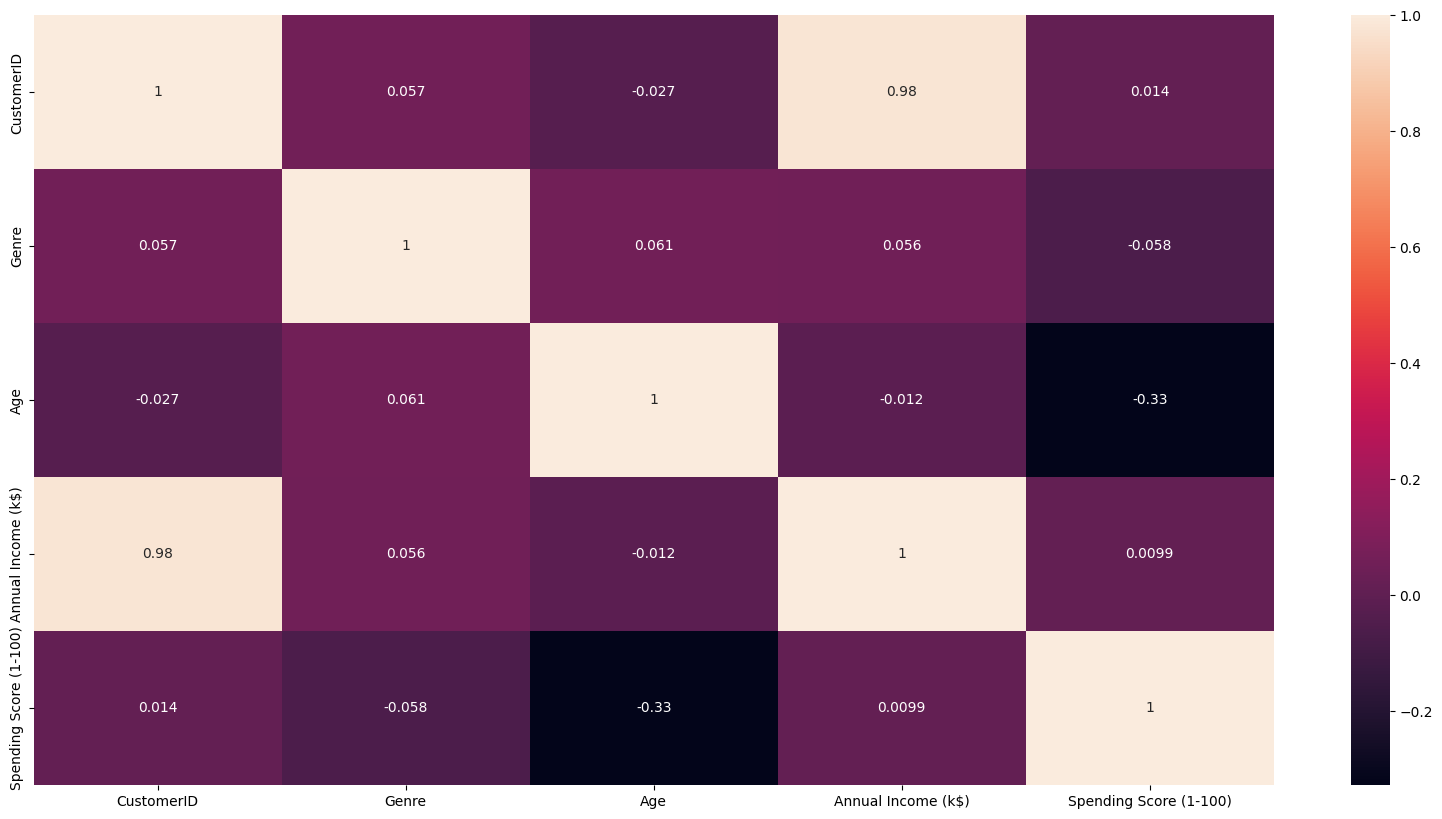

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Видно, что наиболее коррелируемые значения между собой - это Annual Income и CustomerID, но идентификатор не стоит учитывать, поэтому следующие значения - это Age и Spending Score

# 📌Попарная визуализация столбцов базы данных

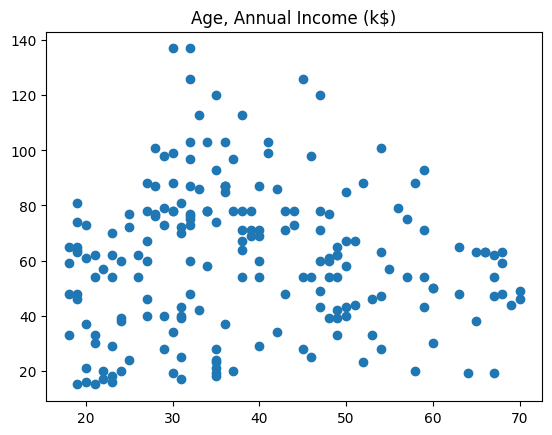

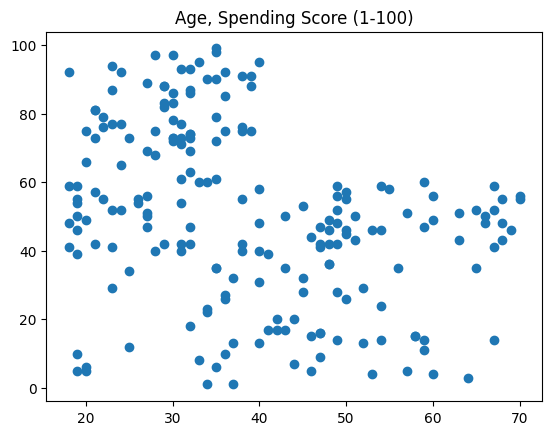

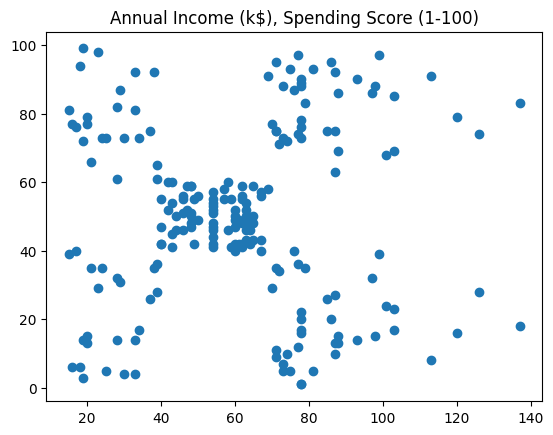

In [5]:
colum = df.columns[2:]
for i in range(len(colum)):
    for j in range(i + 1, len(colum)):
        dat = np.array(df[[colum[i], colum[j]]])

        plt.scatter(dat[:, 0], dat[:, 1])
        plt.title(f'{colum[i]}, {colum[j]}')
        plt.show()

Просто визуалицировал графики, по которым вдальнейшем буду кластеризировать.

# 📌Нахожу кол-во кластеров с помощью метода "Локтя"

In [6]:
from sklearn.cluster import KMeans

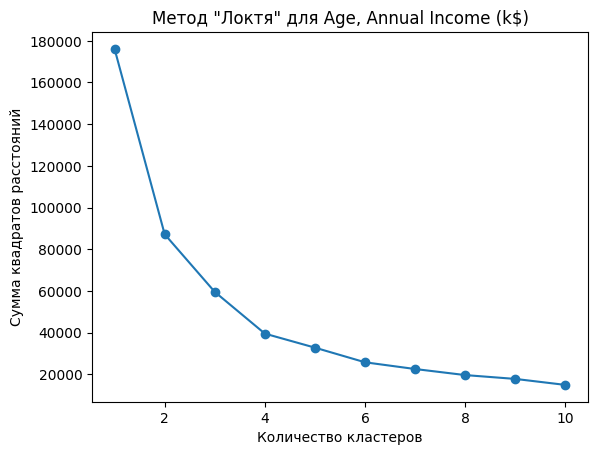

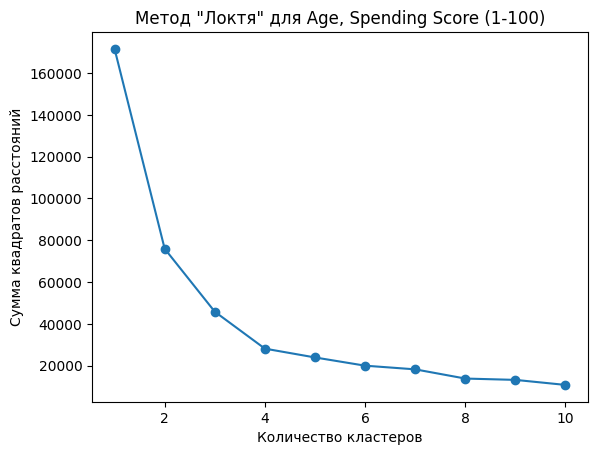

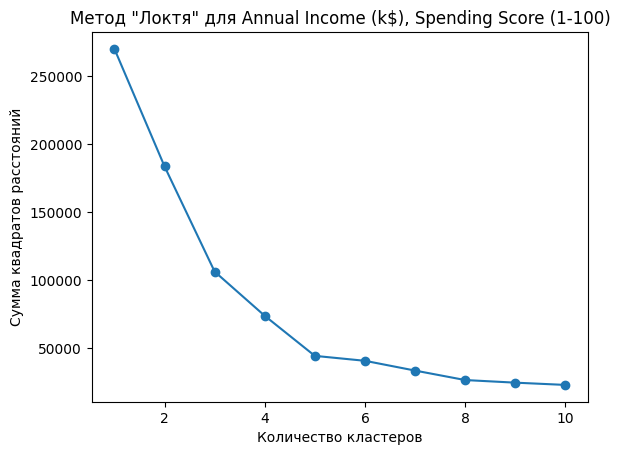

In [7]:
for i in range(len(colum)):
    for j in range(i + 1, len(colum)):
        dta = df[[colum[i], colum[j]]]
        sse = []
        for k in range(1, 11):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(dta)
            sse.append(kmeans.inertia_)
        plt.plot(range(1, 11), sse, marker='o')
        plt.title(f'Метод "Локтя" для {colum[i]}, {colum[j]}')
        plt.xlabel('Количество кластеров')
        plt.ylabel('Сумма квадратов расстояний')
        plt.show()

Во всех "Локтях" сумма квадратов перестаёт существенно уменьшаться в точке 4, кроме третьего "локтя", он перестаёт уменьшаться в точке 5, соответственно мною было выбрано 5 кластеров.

# 📌Кластеризая с помощью K-mean

### 📌Список цветов

In [8]:
import matplotlib.colors as cl
import random as rd
n_col = ['ivory', 'maroon', 'wheat', 'azure', 'honeydew', 'aliceblue', 'aqua', 'cornsilk', 'turquoise','mintcream','peru','mediumaquamarine','plum']
col = [i for i in list(cl.cnames.keys()) if ((i not in n_col) and ('light' not in i) and ('blush' not in i) and ('white' not in i))]
rd.shuffle(col)
col

['cornflowerblue',
 'moccasin',
 'dodgerblue',
 'darkblue',
 'pink',
 'seashell',
 'cadetblue',
 'brown',
 'bisque',
 'tan',
 'darkslateblue',
 'orchid',
 'salmon',
 'goldenrod',
 'teal',
 'forestgreen',
 'palegoldenrod',
 'darkcyan',
 'dimgray',
 'palevioletred',
 'greenyellow',
 'blue',
 'rebeccapurple',
 'mediumorchid',
 'lemonchiffon',
 'mediumturquoise',
 'deepskyblue',
 'blueviolet',
 'gainsboro',
 'limegreen',
 'darkgreen',
 'indianred',
 'black',
 'tomato',
 'khaki',
 'mediumblue',
 'snow',
 'olive',
 'chocolate',
 'blanchedalmond',
 'yellowgreen',
 'mediumvioletred',
 'yellow',
 'slategray',
 'chartreuse',
 'magenta',
 'saddlebrown',
 'darkslategrey',
 'gold',
 'cyan',
 'mediumspringgreen',
 'indigo',
 'powderblue',
 'darkseagreen',
 'red',
 'fuchsia',
 'orangered',
 'mediumpurple',
 'beige',
 'olivedrab',
 'seagreen',
 'grey',
 'darkorange',
 'steelblue',
 'orange',
 'darkred',
 'oldlace',
 'firebrick',
 'linen',
 'crimson',
 'palegreen',
 'mediumslateblue',
 'lime',
 'navy',

Создаю список возможных цветов, чтобы использовать их для разукрашивания кластеров в дальнейшем.

In [9]:
print(f'Количество цветов: {len(col)}')

Количество цветов: 113


### 📌Кластеризация и визуализация

In [10]:
n_cl = 5
if n_cl > len(col): n_cl = len(col)
km = KMeans(n_clusters=n_cl, random_state=5)

1 кластер. 
Age. Мин: 40.000, Макс: 70.000
Annual Income (k$). Мин: 19.000, Макс: 54.000

2 кластер. 
Age. Мин: 28.000, Макс: 54.000
Annual Income (k$). Мин: 93.000, Макс: 137.000

3 кластер. 
Age. Мин: 18.000, Макс: 42.000
Annual Income (k$). Мин: 54.000, Макс: 88.000

4 кластер. 
Age. Мин: 18.000, Макс: 40.000
Annual Income (k$). Мин: 15.000, Макс: 48.000

5 кластер. 
Age. Мин: 43.000, Макс: 68.000
Annual Income (k$). Мин: 57.000, Макс: 93.000



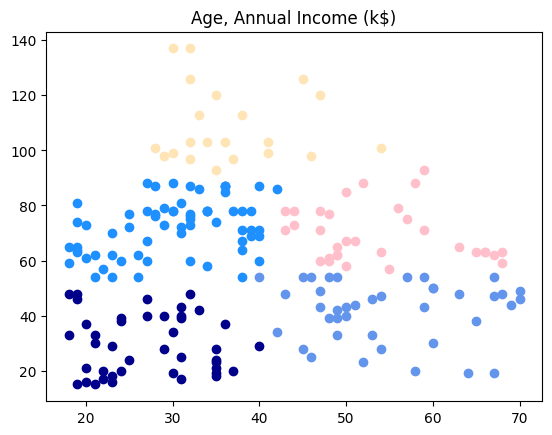

1 кластер. 
Age. Мин: 36.000, Макс: 67.000
Spending Score (1-100). Мин: 3.000, Макс: 35.000

2 кластер. 
Age. Мин: 18.000, Макс: 40.000
Spending Score (1-100). Мин: 68.000, Макс: 99.000

3 кластер. 
Age. Мин: 18.000, Макс: 41.000
Spending Score (1-100). Мин: 34.000, Макс: 66.000

4 кластер. 
Age. Мин: 43.000, Макс: 70.000
Spending Score (1-100). Мин: 35.000, Макс: 60.000

5 кластер. 
Age. Мин: 19.000, Макс: 37.000
Spending Score (1-100). Мин: 1.000, Макс: 29.000



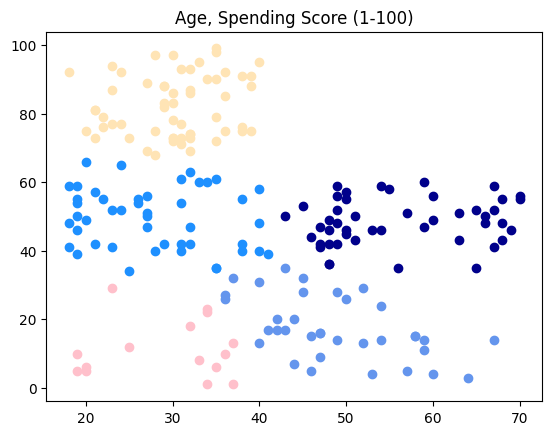

1 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 39.000
Spending Score (1-100). Мин: 3.000, Макс: 40.000

2 кластер. 
Annual Income (k$). Мин: 39.000, Макс: 76.000
Spending Score (1-100). Мин: 35.000, Макс: 61.000

3 кластер. 
Annual Income (k$). Мин: 70.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 39.000

4 кластер. 
Annual Income (k$). Мин: 69.000, Макс: 137.000
Spending Score (1-100). Мин: 63.000, Макс: 97.000

5 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 39.000
Spending Score (1-100). Мин: 61.000, Макс: 99.000



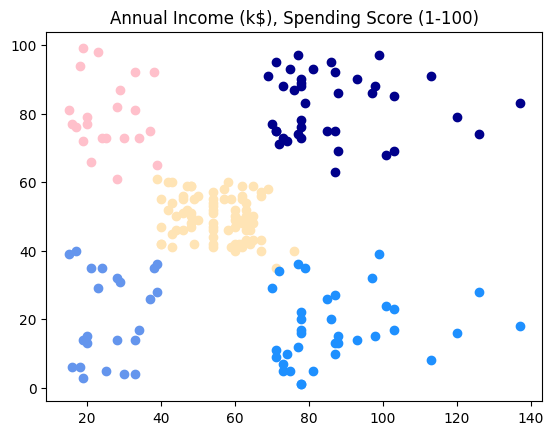

In [23]:
for i in range(len(colum)):
    for j in range(i + 1, len(colum)):
        dt = df[[colum[i], colum[j]]]
        cols = dt.columns
        all_pred = km.fit_predict(dt)
        for k in range(n_cl):
            plt.scatter(dt[all_pred==k][cols[0]] , dt[all_pred==k][cols[1]], color = col[k])
            print(f"{k+1} кластер. \n{colum[i]}. Мин: {dt[all_pred==k][cols[0]].min():.3f}, Макс: {dt[all_pred==k][cols[0]].max():.3f}\n{colum[j]}. Мин: {dt[all_pred==k][cols[1]].min():.3f}, Макс: {dt[all_pred==k][cols[1]].max():.3f}\n")
        plt.title(f'{colum[i]}, {colum[j]}')
        plt.show()


1) В первом варианте люди распределились в основном по заработку, а затем уже по возрасту внутри своих групп.
2) Во втором варианте на категории: 
молодые 1) с низкой оценкой дохода и 2) с высокой оценкой дохода; старшее поколение 1) с низкой оценкой дохода и 2) с высокой оценкой дохода; люди среднего возраста с высокой оценкой дохода.
3) В третьем варианте идёт разделение на высокий заработок с хорошой и плохой оценкой дохода; низкий заработок с хорошой и плохой оценкой дохода; средний заработок с средней оценкой дохода.

# 📌Масштабирование данных

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
scaler = StandardScaler()
ds = scaler.fit_transform(df[df.columns[1:]])
ds = normalize(ds)
ds = pd.DataFrame(ds)

# 📌Алгоритм t-SNE

Для начала я пробую уменьшить размерность двух столбцов без масштабирования данных.

Перплексия: 5
1 кластер. 
Age. Мин: 18.000, Макс: 49.000
Annual Income (k$). Мин: 46.000, Макс: 73.000

2 кластер. 
Age. Мин: 45.000, Макс: 70.000
Annual Income (k$). Мин: 19.000, Макс: 67.000

3 кластер. 
Age. Мин: 27.000, Макс: 59.000
Annual Income (k$). Мин: 71.000, Макс: 137.000

4 кластер. 
Age. Мин: 18.000, Макс: 42.000
Annual Income (k$). Мин: 15.000, Макс: 48.000

5 кластер. 
Age. Мин: 19.000, Макс: 39.000
Annual Income (k$). Мин: 67.000, Макс: 81.000



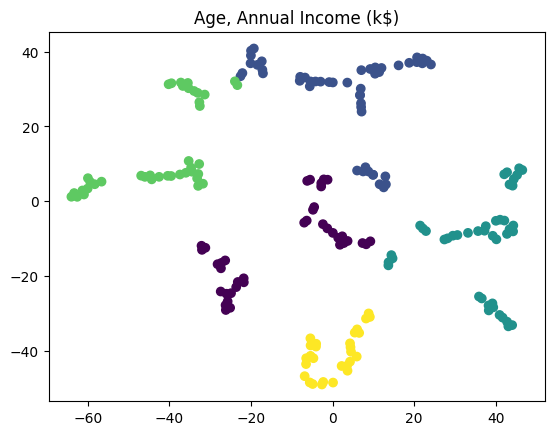

Перплексия: 30
1 кластер. 
Age. Мин: 27.000, Макс: 59.000
Annual Income (k$). Мин: 85.000, Макс: 137.000

2 кластер. 
Age. Мин: 18.000, Макс: 67.000
Annual Income (k$). Мин: 15.000, Макс: 48.000

3 кластер. 
Age. Мин: 38.000, Макс: 70.000
Annual Income (k$). Мин: 30.000, Макс: 71.000

4 кластер. 
Age. Мин: 18.000, Макс: 34.000
Annual Income (k$). Мин: 46.000, Макс: 74.000

5 кластер. 
Age. Мин: 19.000, Макс: 57.000
Annual Income (k$). Мин: 64.000, Макс: 81.000



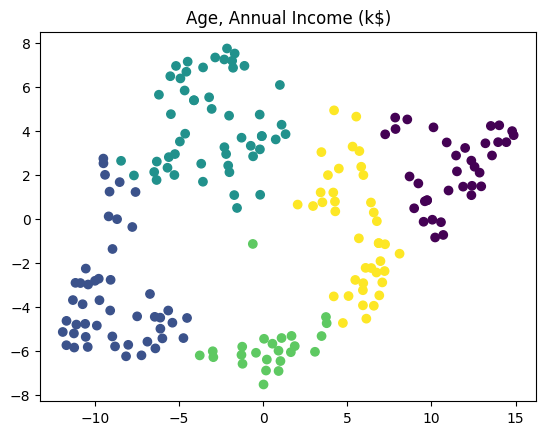

Перплексия: 50
1 кластер. 
Age. Мин: 19.000, Макс: 48.000
Annual Income (k$). Мин: 64.000, Макс: 81.000

2 кластер. 
Age. Мин: 38.000, Макс: 70.000
Annual Income (k$). Мин: 30.000, Макс: 75.000

3 кластер. 
Age. Мин: 27.000, Макс: 59.000
Annual Income (k$). Мин: 79.000, Макс: 137.000

4 кластер. 
Age. Мин: 18.000, Макс: 67.000
Annual Income (k$). Мин: 15.000, Макс: 48.000

5 кластер. 
Age. Мин: 18.000, Макс: 34.000
Annual Income (k$). Мин: 54.000, Макс: 74.000



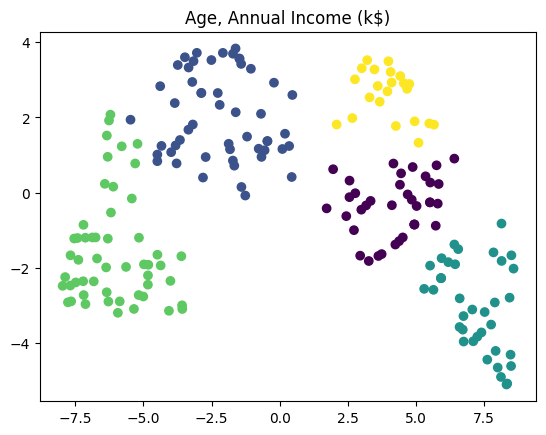

Перплексия: 100
1 кластер. 
Age. Мин: 18.000, Макс: 44.000
Annual Income (k$). Мин: 54.000, Макс: 81.000

2 кластер. 
Age. Мин: 42.000, Макс: 69.000
Annual Income (k$). Мин: 19.000, Макс: 49.000

3 кластер. 
Age. Мин: 18.000, Макс: 40.000
Annual Income (k$). Мин: 15.000, Макс: 48.000

4 кластер. 
Age. Мин: 27.000, Макс: 59.000
Annual Income (k$). Мин: 77.000, Макс: 137.000

5 кластер. 
Age. Мин: 38.000, Макс: 70.000
Annual Income (k$). Мин: 46.000, Макс: 75.000



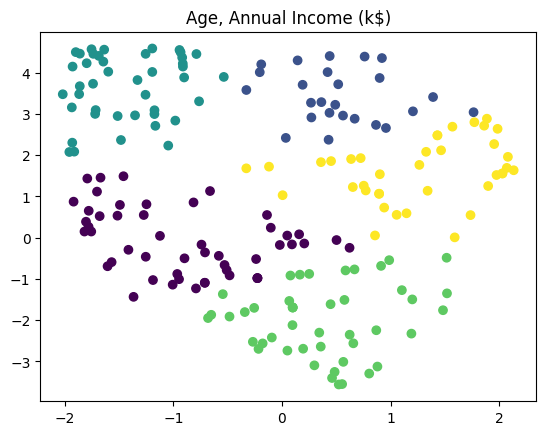

Перплексия: 5
1 кластер. 
Age. Мин: 19.000, Макс: 67.000
Spending Score (1-100). Мин: 1.000, Макс: 42.000

2 кластер. 
Age. Мин: 18.000, Макс: 35.000
Spending Score (1-100). Мин: 29.000, Макс: 63.000

3 кластер. 
Age. Мин: 38.000, Макс: 70.000
Spending Score (1-100). Мин: 35.000, Макс: 60.000

4 кластер. 
Age. Мин: 20.000, Макс: 39.000
Spending Score (1-100). Мин: 65.000, Макс: 81.000

5 кластер. 
Age. Мин: 18.000, Макс: 40.000
Spending Score (1-100). Мин: 82.000, Макс: 99.000



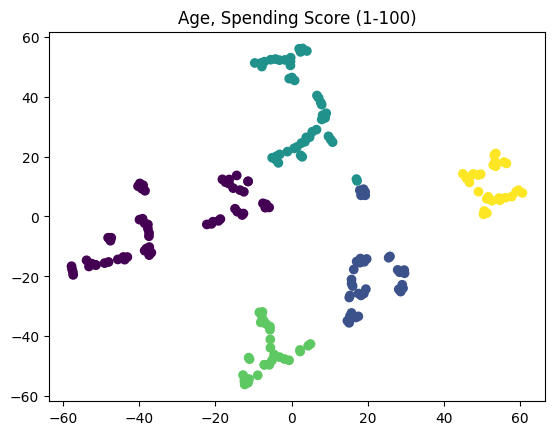

Перплексия: 30
1 кластер. 
Age. Мин: 20.000, Макс: 39.000
Spending Score (1-100). Мин: 65.000, Макс: 81.000

2 кластер. 
Age. Мин: 19.000, Макс: 67.000
Spending Score (1-100). Мин: 1.000, Макс: 35.000

3 кластер. 
Age. Мин: 18.000, Макс: 40.000
Spending Score (1-100). Мин: 29.000, Макс: 63.000

4 кластер. 
Age. Мин: 40.000, Макс: 70.000
Spending Score (1-100). Мин: 35.000, Макс: 60.000

5 кластер. 
Age. Мин: 18.000, Макс: 40.000
Spending Score (1-100). Мин: 82.000, Макс: 99.000



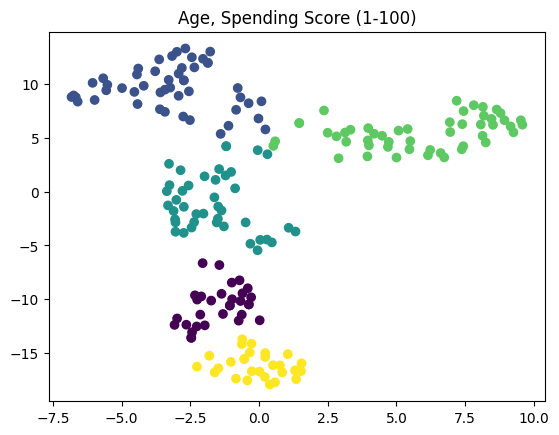

Перплексия: 50
1 кластер. 
Age. Мин: 19.000, Макс: 67.000
Spending Score (1-100). Мин: 1.000, Макс: 32.000

2 кластер. 
Age. Мин: 18.000, Макс: 40.000
Spending Score (1-100). Мин: 46.000, Макс: 66.000

3 кластер. 
Age. Мин: 18.000, Макс: 40.000
Spending Score (1-100). Мин: 68.000, Макс: 99.000

4 кластер. 
Age. Мин: 43.000, Макс: 70.000
Spending Score (1-100). Мин: 35.000, Макс: 60.000

5 кластер. 
Age. Мин: 18.000, Макс: 43.000
Spending Score (1-100). Мин: 29.000, Макс: 48.000



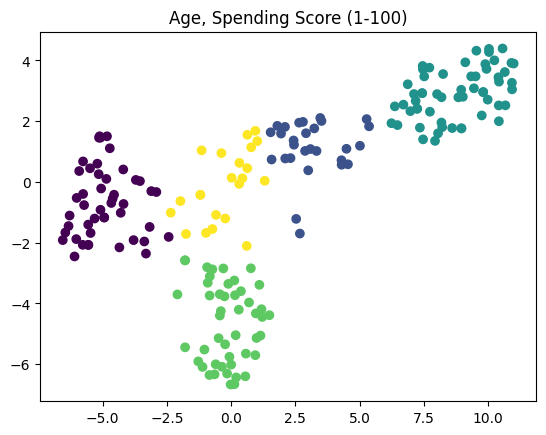

Перплексия: 100
1 кластер. 
Age. Мин: 19.000, Макс: 67.000
Spending Score (1-100). Мин: 1.000, Макс: 35.000

2 кластер. 
Age. Мин: 20.000, Макс: 39.000
Spending Score (1-100). Мин: 61.000, Макс: 79.000

3 кластер. 
Age. Мин: 18.000, Макс: 40.000
Spending Score (1-100). Мин: 34.000, Макс: 60.000

4 кластер. 
Age. Мин: 40.000, Макс: 70.000
Spending Score (1-100). Мин: 35.000, Макс: 60.000

5 кластер. 
Age. Мин: 18.000, Макс: 40.000
Spending Score (1-100). Мин: 81.000, Макс: 99.000



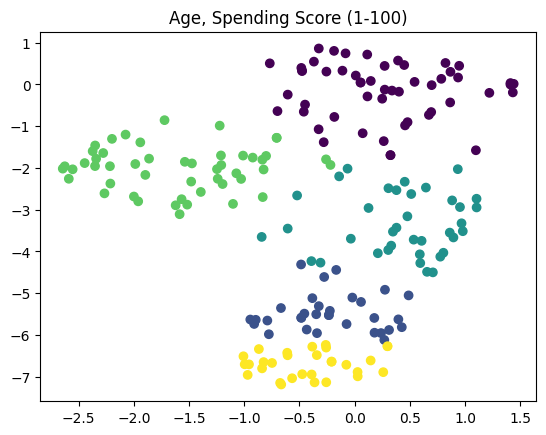

Перплексия: 5
1 кластер. 
Annual Income (k$). Мин: 69.000, Макс: 137.000
Spending Score (1-100). Мин: 63.000, Макс: 97.000

2 кластер. 
Annual Income (k$). Мин: 59.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 43.000

3 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 46.000
Spending Score (1-100). Мин: 3.000, Макс: 47.000

4 кластер. 
Annual Income (k$). Мин: 39.000, Макс: 69.000
Spending Score (1-100). Мин: 41.000, Макс: 65.000

5 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 38.000
Spending Score (1-100). Мин: 61.000, Макс: 99.000



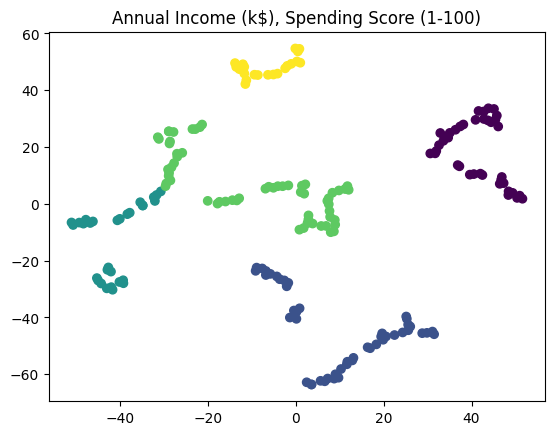

Перплексия: 30
1 кластер. 
Annual Income (k$). Мин: 46.000, Макс: 69.000
Spending Score (1-100). Мин: 40.000, Макс: 60.000

2 кластер. 
Annual Income (k$). Мин: 69.000, Макс: 137.000
Spending Score (1-100). Мин: 63.000, Макс: 97.000

3 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 46.000
Spending Score (1-100). Мин: 3.000, Макс: 50.000

4 кластер. 
Annual Income (k$). Мин: 70.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 40.000

5 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 48.000
Spending Score (1-100). Мин: 52.000, Макс: 99.000



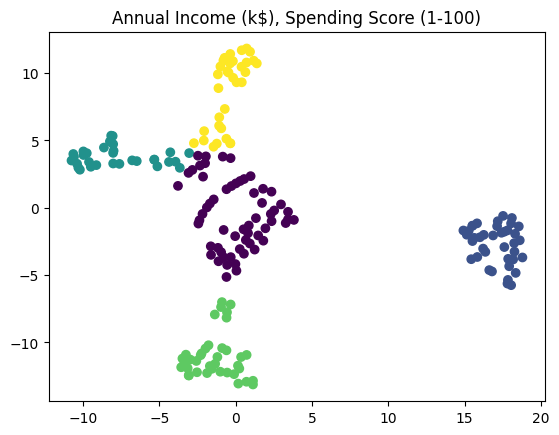

Перплексия: 50
1 кластер. 
Annual Income (k$). Мин: 69.000, Макс: 137.000
Spending Score (1-100). Мин: 63.000, Макс: 97.000

2 кластер. 
Annual Income (k$). Мин: 46.000, Макс: 69.000
Spending Score (1-100). Мин: 40.000, Макс: 60.000

3 кластер. 
Annual Income (k$). Мин: 70.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 40.000

4 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 46.000
Spending Score (1-100). Мин: 3.000, Макс: 50.000

5 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 48.000
Spending Score (1-100). Мин: 52.000, Макс: 99.000



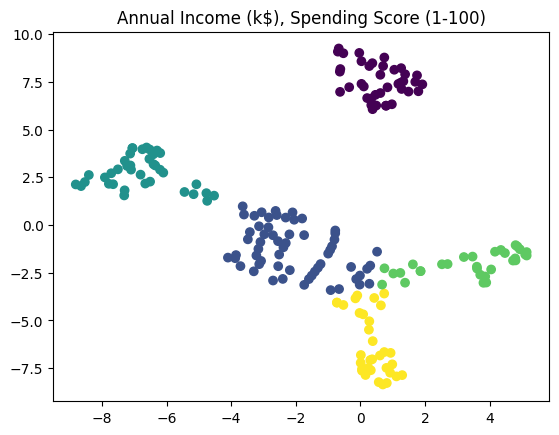

Перплексия: 100
1 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 43.000
Spending Score (1-100). Мин: 3.000, Макс: 47.000

2 кластер. 
Annual Income (k$). Мин: 42.000, Макс: 69.000
Spending Score (1-100). Мин: 40.000, Макс: 60.000

3 кластер. 
Annual Income (k$). Мин: 70.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 40.000

4 кластер. 
Annual Income (k$). Мин: 69.000, Макс: 137.000
Spending Score (1-100). Мин: 63.000, Макс: 97.000

5 кластер. 
Annual Income (k$). Мин: 15.000, Макс: 43.000
Spending Score (1-100). Мин: 55.000, Макс: 99.000



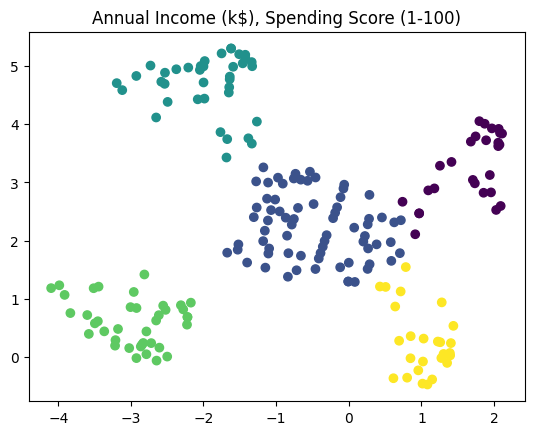

In [22]:
from sklearn.manifold import TSNE
perplexities = [5, 30, 50, 100]
kme = KMeans(n_clusters=n_cl)
for i in range(len(colum)):
    for j in range(i + 1, len(colum)):
        data = np.array(df[[colum[i], colum[j]]]) 
        for k in perplexities:
            print(f'Перплексия: {k}')
            model = TSNE(learning_rate=50, perplexity=k, random_state=50)
            transformed = model.fit_transform(data)
            x_axis = transformed[:, 0]
            y_axis = transformed[:, 1]
            al_pred = kme.fit_predict(transformed)
            plt.scatter(x_axis, y_axis, c=al_pred)
            for u in range(n_cl):
                print(f"{u+1} кластер. \n{colum[i]}. Мин: {data[al_pred==u][:, 0].min():.3f}, Макс: {data[al_pred==u][:, 0].max():.3f}\n{colum[j]}. Мин: {data[al_pred==u][:, 1].min():.3f}, Макс: {data[al_pred==u][:, 1].max():.3f}\n")
            plt.title(f'{colum[i]}, {colum[j]}')
            plt.show()

При уменьшении перплексии кластеры становятся уникальнее: уникальных признаков становится больше, люди делятся и по одному признаку, и по другому, но только так.
Иначе же кластеры имеют более пересекающиеся значения: там более тонкое распределение.

# 📌SpectralClustering

Здесь я работаю с уже нормализованными данными. И использую понижение размерности на трёх последних, значимых столбцах.

Перплексия: 8
1 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 27.000, Макс: 40.000
Annual Income (k$). Мин: 58.000, Макс: 120.000
Spending Score (1-100). Мин: 58.000, Макс: 95.000

2 кластер. 
Genre. Мин: 0.000, Макс: 1.000
Age. Мин: 18.000, Макс: 68.000
Annual Income (k$). Мин: 16.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 99.000

3 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 18.000, Макс: 70.000
Annual Income (k$). Мин: 15.000, Макс: 63.000
Spending Score (1-100). Мин: 3.000, Макс: 92.000

4 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 27.000, Макс: 40.000
Annual Income (k$). Мин: 69.000, Макс: 137.000
Spending Score (1-100). Мин: 63.000, Макс: 97.000

5 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 18.000, Макс: 27.000
Annual Income (k$). Мин: 46.000, Макс: 67.000
Spending Score (1-100). Мин: 41.000, Макс: 59.000



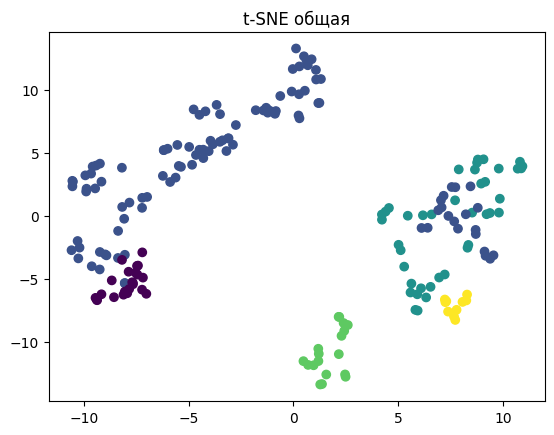

Перплексия: 30
1 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 18.000, Макс: 68.000
Annual Income (k$). Мин: 16.000, Макс: 126.000
Spending Score (1-100). Мин: 5.000, Макс: 99.000

2 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 19.000, Макс: 59.000
Annual Income (k$). Мин: 71.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 36.000

3 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 18.000, Макс: 70.000
Annual Income (k$). Мин: 15.000, Макс: 67.000
Spending Score (1-100). Мин: 3.000, Макс: 92.000

4 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 27.000, Макс: 40.000
Annual Income (k$). Мин: 69.000, Макс: 137.000
Spending Score (1-100). Мин: 63.000, Макс: 97.000

5 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 27.000, Макс: 40.000
Annual Income (k$). Мин: 69.000, Макс: 120.000
Spending Score (1-100). Мин: 58.000, Макс: 95.000



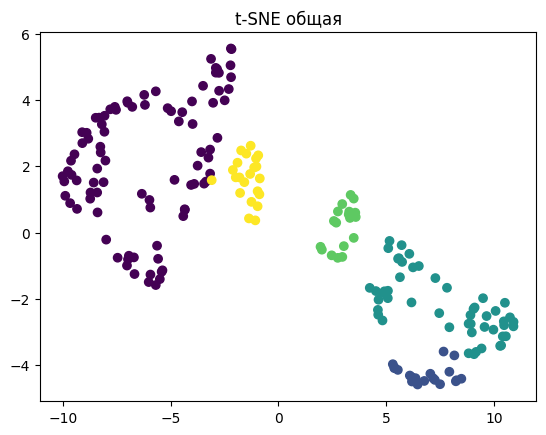

Перплексия: 50
1 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 27.000, Макс: 40.000
Annual Income (k$). Мин: 69.000, Макс: 120.000
Spending Score (1-100). Мин: 58.000, Макс: 95.000

2 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 18.000, Макс: 35.000
Annual Income (k$). Мин: 16.000, Макс: 76.000
Spending Score (1-100). Мин: 6.000, Макс: 99.000

3 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 18.000, Макс: 40.000
Annual Income (k$). Мин: 15.000, Макс: 137.000
Spending Score (1-100). Мин: 39.000, Макс: 97.000

4 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 34.000, Макс: 68.000
Annual Income (k$). Мин: 18.000, Макс: 126.000
Spending Score (1-100). Мин: 5.000, Макс: 59.000

5 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 19.000, Макс: 70.000
Annual Income (k$). Мин: 19.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 60.000



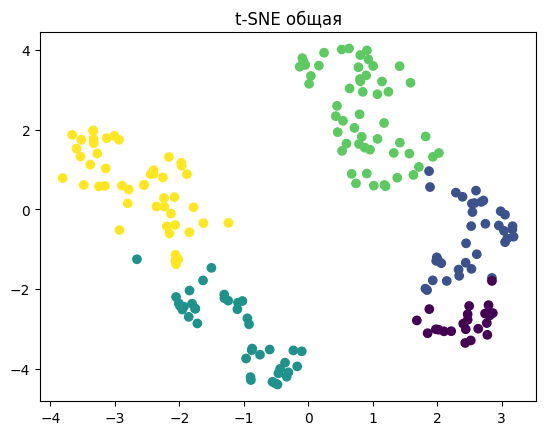

Перплексия: 100
1 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 27.000, Макс: 40.000
Annual Income (k$). Мин: 69.000, Макс: 120.000
Spending Score (1-100). Мин: 58.000, Макс: 95.000

2 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 34.000, Макс: 68.000
Annual Income (k$). Мин: 18.000, Макс: 126.000
Spending Score (1-100). Мин: 5.000, Макс: 59.000

3 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 18.000, Макс: 40.000
Annual Income (k$). Мин: 15.000, Макс: 137.000
Spending Score (1-100). Мин: 35.000, Макс: 97.000

4 кластер. 
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 19.000, Макс: 70.000
Annual Income (k$). Мин: 19.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 60.000

5 кластер. 
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 18.000, Макс: 35.000
Annual Income (k$). Мин: 16.000, Макс: 76.000
Spending Score (1-100). Мин: 6.000, Макс: 99.000



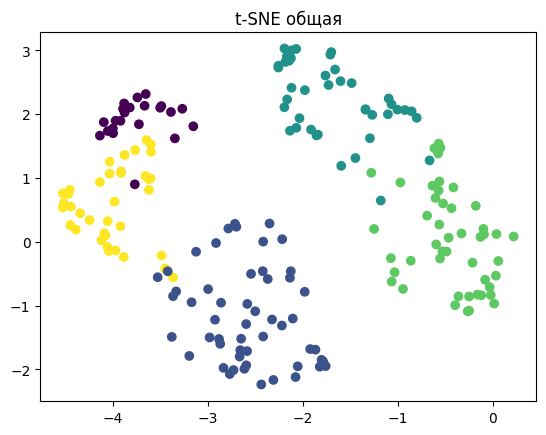

In [29]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=n_cl, random_state=15)

perplexitie = [8, 30, 50, 100]


for k in perplexitie:
    print(f'Перплексия: {k}')
    model = TSNE(learning_rate=10, perplexity=k, random_state=50, n_components=3)
    transformed = model.fit_transform(ds)
    x_axis = transformed[:, 0]
    y_axis = transformed[:, 1]
    ale_pred = sc.fit_predict(transformed)
    plt.scatter(x_axis, y_axis, c=ale_pred)
    for u in range(n_cl):
        print(f"{u+1} кластер. \nGenre. Мин: {df['Genre'][ale_pred==u].min():.3f}, Макс: {df['Genre'][ale_pred==u].max():.3f}\nAge. Мин: {df['Age'][ale_pred==u].min():.3f}, Макс: {df['Age'][ale_pred==u].max():.3f}\nAnnual Income (k$). Мин: {df['Annual Income (k$)'][ale_pred==u].min():.3f}, Макс: {df['Annual Income (k$)'][ale_pred==u].max():.3f}\nSpending Score (1-100). Мин: {df['Spending Score (1-100)'][ale_pred==u].min():.3f}, Макс: {df['Spending Score (1-100)'][ale_pred==u].max():.3f}\n")
    plt.title('t-SNE общая')
    plt.show()

Люди в основном группируются по полу, но далее уже распределяются по доходу и возрасту. Но с повышением перплексии конкретные различия становятся менее различимы, хотя всё равно остаются различны.

Также с повышением перплексии кластеры становятся более равномерны по размеру, поэтому кол-во кластеров с женщинами начинает преобладать над кол-вом кластеров с мужчинами.

Во втором кластере при перплексии 8 имеется среди женщин несколько мужчин. Это может быть связано с тем, что данные в этом кластере слишком разбросаны, но такое происходит только с очень маленькой перплексией.

# 📌Иерархическая кластеризация

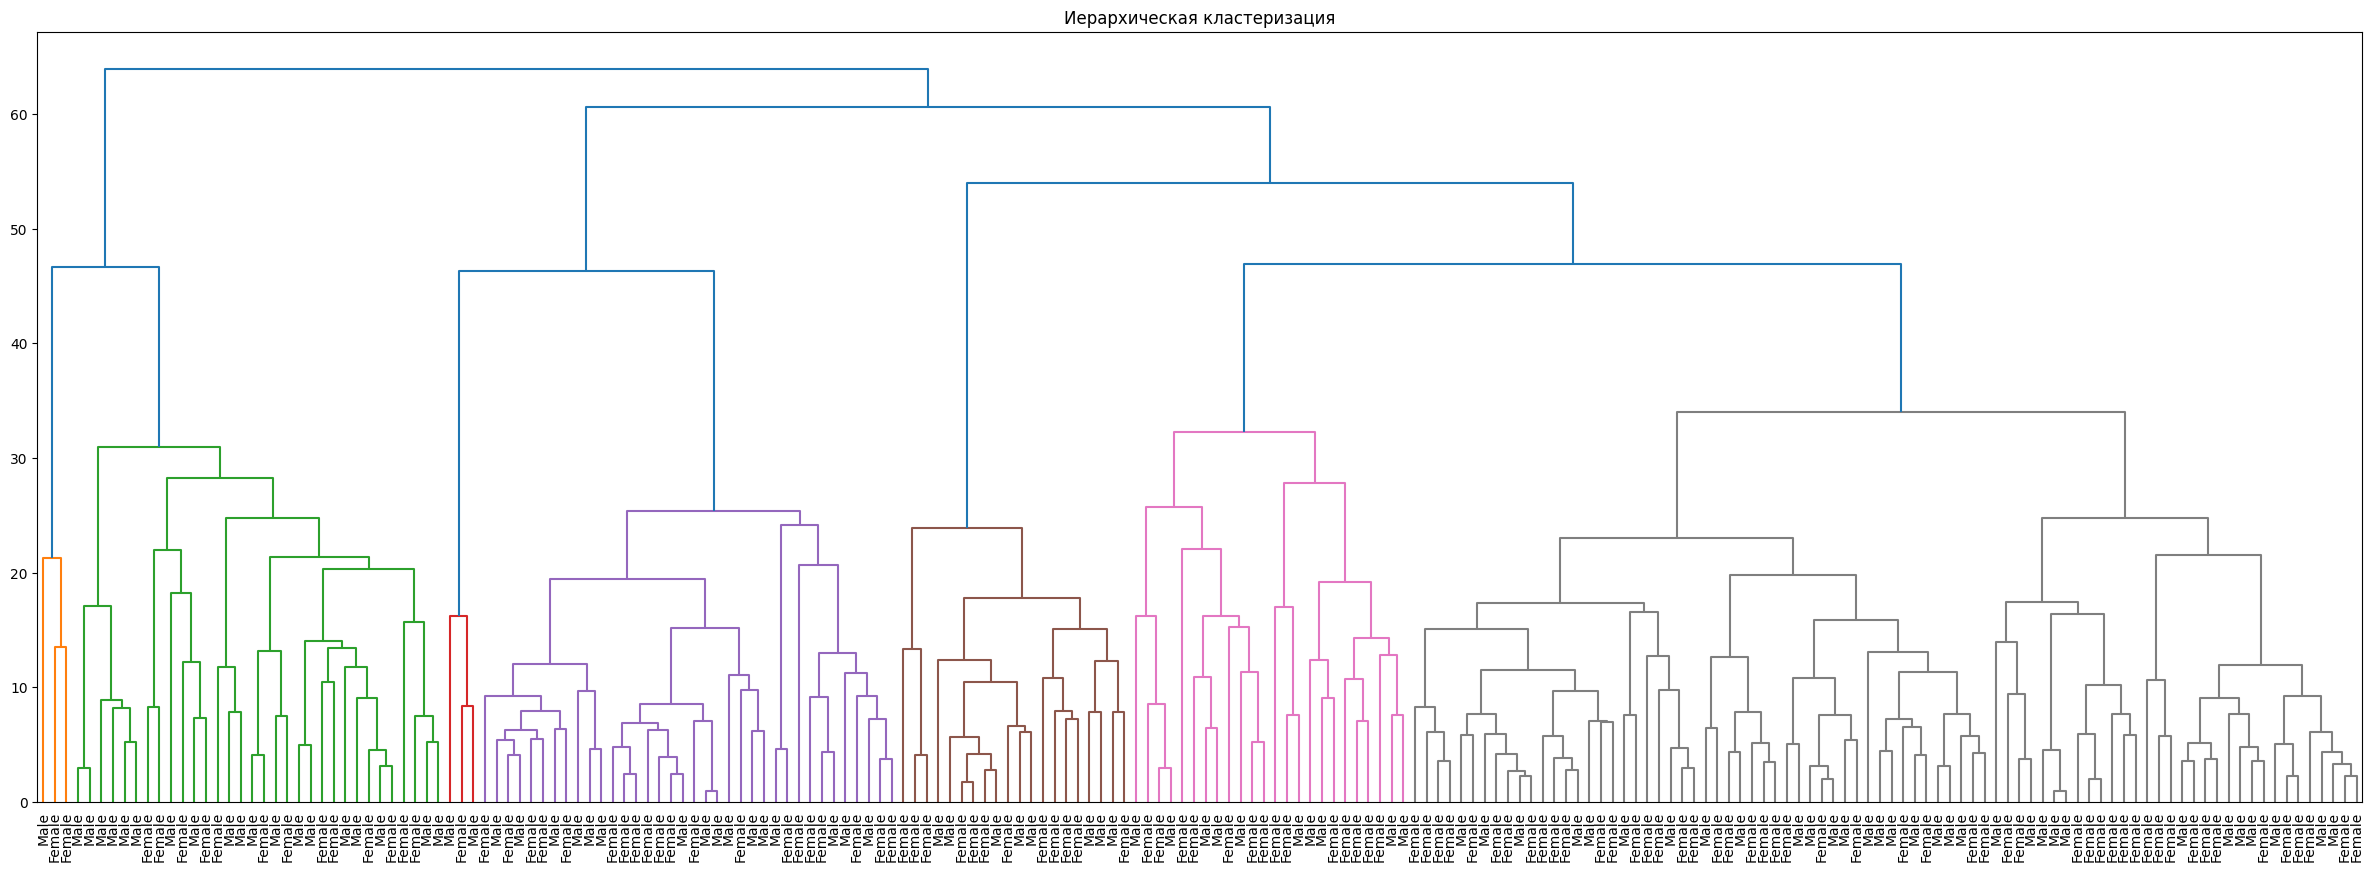

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
tes = df[df.columns[2:]].copy()
varieties = list(le.inverse_transform(df['Genre']))
samples = tes.values
mergings = linkage(samples, method='average')
plt.figure(figsize=(30,10))
dendrogram(mergings,
        labels=varieties,
        leaf_rotation=90,
        leaf_font_size=10,
        )
plt.title('Иерархическая кластеризация')
plt.show()

Иерархическая кластеризация разбила все значения на семь кластеров, хотя два из них состоят всего лишь из трёх элементов, поэтому их скорее всего можно добавить в другие два кластера и результат от этого не сильно изменится. Поэтому можно сказать, что полнценных кластеров тут пять.

# 📌DBSCAN

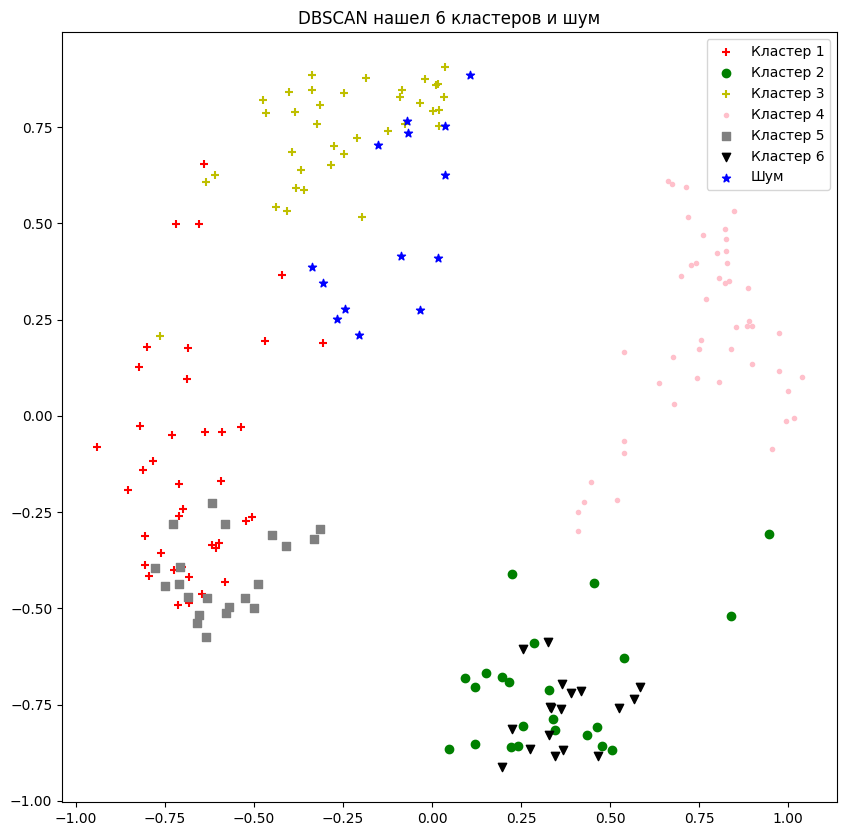

Шумы. Кол-во: 14, 200
1 кластер. Кол-во: 40
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 18.000, Макс: 40.000
Annual Income (k$). Мин: 16.000, Макс: 76.000
Spending Score (1-100). Мин: 6.000, Макс: 99.000

2 кластер. Кол-во: 23
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 18.000, Макс: 40.000
Annual Income (k$). Мин: 15.000, Макс: 67.000
Spending Score (1-100). Мин: 39.000, Макс: 92.000

3 кластер. Кол-во: 37
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 35.000, Макс: 68.000
Annual Income (k$). Мин: 18.000, Макс: 79.000
Spending Score (1-100). Мин: 5.000, Макс: 59.000

4 кластер. Кол-во: 47
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 19.000, Макс: 70.000
Annual Income (k$). Мин: 19.000, Макс: 137.000
Spending Score (1-100). Мин: 1.000, Макс: 60.000

5 кластер. Кол-во: 21
Genre. Мин: 0.000, Макс: 0.000
Age. Мин: 27.000, Макс: 38.000
Annual Income (k$). Мин: 70.000, Макс: 120.000
Spending Score (1-100). Мин: 69.000, Макс: 95.000

6 кластер. Кол-во: 18
Genre. Мин: 1.000, Макс: 1.000
Age. Мин: 27.000, Мак

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


dbscan = DBSCAN(eps=0.61, min_samples=15)

dbscan.fit(ds)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=4).fit(ds)
pca_2d = pca.transform(ds)

plt.figure(figsize=(10,10))

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='+')
    elif dbscan.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='pink', marker='.')
    elif dbscan.labels_[i] == 4:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='grey', marker=',')
    elif dbscan.labels_[i] == 5:
        c6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='black', marker='v')
    elif dbscan.labels_[i] == -1:
        c7 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3, c4, c5, c6, c7], ['Кластер 1', 'Кластер 2', 'Кластер 3','Кластер 4','Кластер 5','Кластер 6','Шум'])
plt.title('DBSCAN нашел 6 кластеров и шум')
plt.show()
print(f"Шумы. Кол-во: {dbscan.labels_[dbscan.labels_==-1].size}, {dbscan.labels_.size}")
for i in range(n_cl+1):
    print(f"{i+1} кластер. Кол-во: {dbscan.labels_[dbscan.labels_==i].size}\nGenre. Мин: {df['Genre'][dbscan.labels_==i].min():.3f}, Макс: {df['Genre'][dbscan.labels_==i].max():.3f}\nAge. Мин: {df['Age'][dbscan.labels_==i].min():.3f}, Макс: {df['Age'][dbscan.labels_==i].max():.3f}\nAnnual Income (k$). Мин: {df['Annual Income (k$)'][dbscan.labels_==i].min():.3f}, Макс: {df['Annual Income (k$)'][dbscan.labels_==i].max():.3f}\nSpending Score (1-100). Мин: {df['Spending Score (1-100)'][dbscan.labels_==i].min():.3f}, Макс: {df['Spending Score (1-100)'][dbscan.labels_==i].max():.3f}\n")



В первую очередь люди делятся по полу, а уже потом эти категории делятся по остальным признакам.

Не учитываю пол

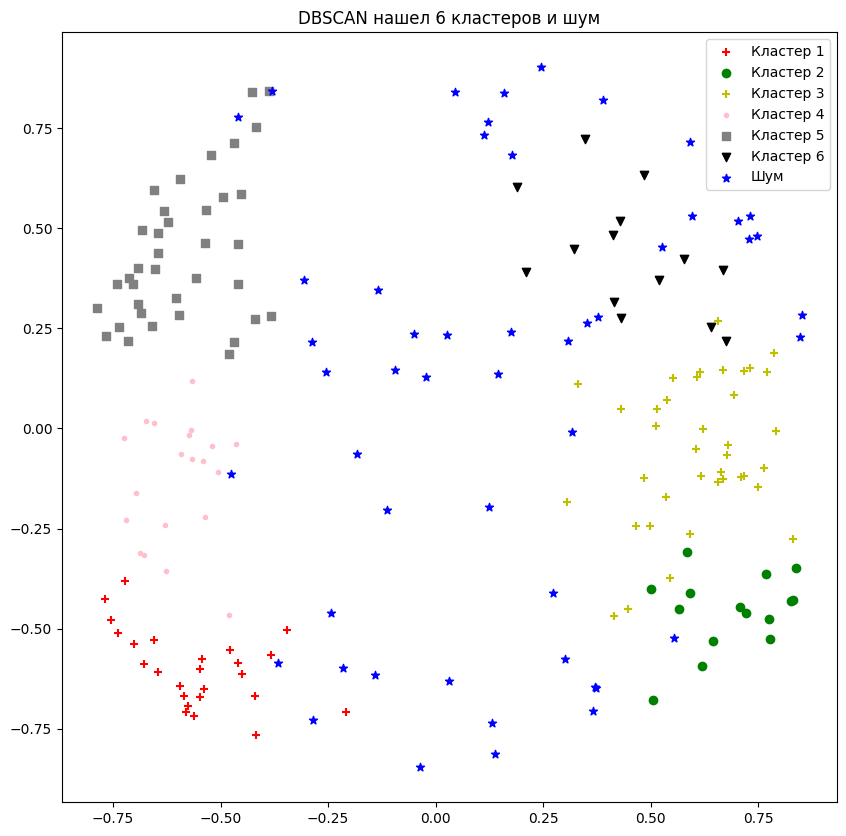

Шумы. Кол-во: 51, 200
1 кластер. Кол-во: 25
Age. Мин: 18.000, Макс: 35.000
Annual Income (k$). Мин: 15.000, Макс: 43.000
Spending Score (1-100). Мин: 54.000, Макс: 99.000

2 кластер. Кол-во: 15
Age. Мин: 45.000, Макс: 67.000
Annual Income (k$). Мин: 19.000, Макс: 49.000
Spending Score (1-100). Мин: 3.000, Макс: 45.000

3 кластер. Кол-во: 38
Age. Мин: 45.000, Макс: 70.000
Annual Income (k$). Мин: 38.000, Макс: 67.000
Spending Score (1-100). Мин: 35.000, Макс: 60.000

4 кластер. Кол-во: 20
Age. Мин: 18.000, Макс: 27.000
Annual Income (k$). Мин: 46.000, Макс: 67.000
Spending Score (1-100). Мин: 41.000, Макс: 59.000

5 кластер. Кол-во: 37
Age. Мин: 27.000, Макс: 40.000
Annual Income (k$). Мин: 69.000, Макс: 137.000
Spending Score (1-100). Мин: 63.000, Макс: 97.000

6 кластер. Кол-во: 14
Age. Мин: 34.000, Макс: 47.000
Annual Income (k$). Мин: 71.000, Макс: 103.000
Spending Score (1-100). Мин: 1.000, Макс: 35.000



In [28]:
dbscan = DBSCAN(eps=0.283, min_samples=10)

dbscan.fit(ds[ds.columns[1:]])

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=3).fit(ds[ds.columns[1:]])
pca_2d = pca.transform(ds[ds.columns[1:]])

plt.figure(figsize=(10,10))

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='+')
    elif dbscan.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='pink', marker='.')
    elif dbscan.labels_[i] == 4:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='grey', marker=',')
    elif dbscan.labels_[i] == 5:
        c6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='black', marker='v')
    elif dbscan.labels_[i] == -1:
        c7 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3, c4, c5, c6, c7], ['Кластер 1', 'Кластер 2', 'Кластер 3','Кластер 4','Кластер 5','Кластер 6','Шум'])
plt.title('DBSCAN нашел 6 кластеров и шум')
plt.show()
print(f"Шумы. Кол-во: {dbscan.labels_[dbscan.labels_==-1].size}, {dbscan.labels_.size}")
for i in range(n_cl+1):
    print(f"{i+1} кластер. Кол-во: {dbscan.labels_[dbscan.labels_==i].size}\nAge. Мин: {df['Age'][dbscan.labels_==i].min():.3f}, Макс: {df['Age'][dbscan.labels_==i].max():.3f}\nAnnual Income (k$). Мин: {df['Annual Income (k$)'][dbscan.labels_==i].min():.3f}, Макс: {df['Annual Income (k$)'][dbscan.labels_==i].max():.3f}\nSpending Score (1-100). Мин: {df['Spending Score (1-100)'][dbscan.labels_==i].min():.3f}, Макс: {df['Spending Score (1-100)'][dbscan.labels_==i].max():.3f}\n")


В среднем они равномерно распределены, хотя и имеются шумы, которые не относятся ни к одному кластеру.

Тут есть малого возраста с большим и с маленьким доходом (с большой и средней оценкой дохода), старшие в среднем с средне-высоким доходом (с большой и низкой оценкой дохода). Ну и люди среднего возраста с большим доходом и разной оценкой.